# MOBILE Price Classification

In [1]:
from IPython.display import Image
Image(url='https://m-cdn.phonearena.com/images/article/64576-wide-two_940/The-Best-Phones-in-2022-updated-August', width=1000, height=800)


<span style="color:blue"> *
    CONTEXT: 
    Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.
He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.
Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.
In this problem you do not have to predict actual price but a price range indicating how high the price is*</span>

# Import libraries

In [2]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

Extracting data

In [3]:
df = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')

Let's see how many columnss and rows we have

In [4]:
df.shape

(2000, 21)

In [5]:
df.head(2)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2


In [6]:
df.info()    #we can see data types in here

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

as wee see there are no categorical columns

In [7]:
df.describe() # describing data help us to see min and max values

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
df['battery_power'].unique()

array([ 842, 1021,  563, ..., 1139, 1467,  858])

is there have any null values? as wee see the data is clean

In [9]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [10]:
cat_features=list()
num_features=list()
for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    if unique_values<30:
      cat_features.append(column_name)
    else:
      num_features.append(column_name)

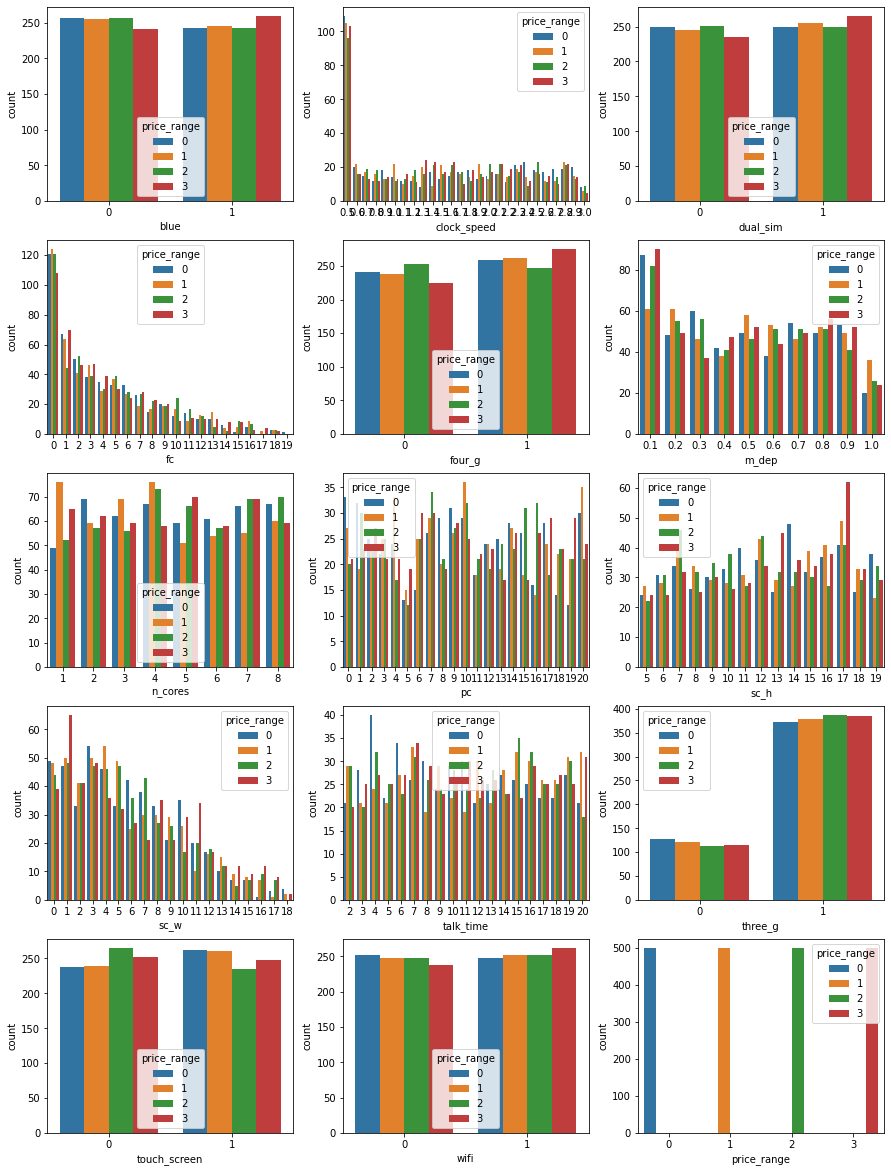

In [11]:
i = 1
plt.figure(figsize = (15,25))
for feature in cat_features:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , data = df,hue='price_range')
    i +=1

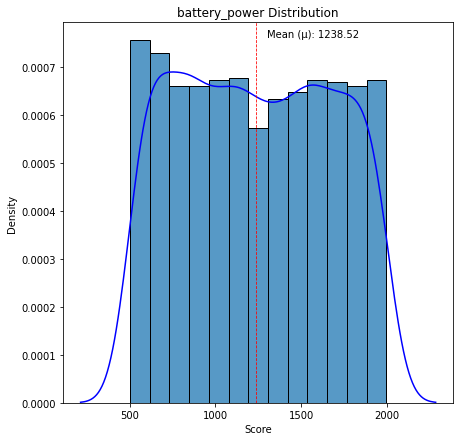

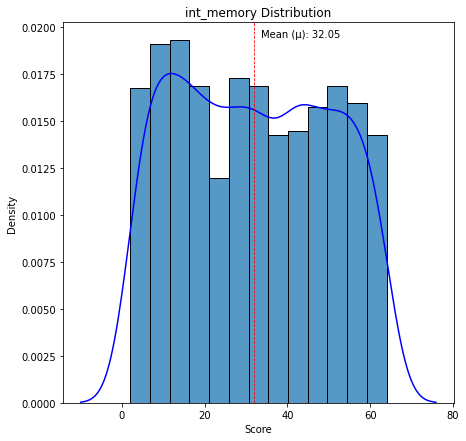

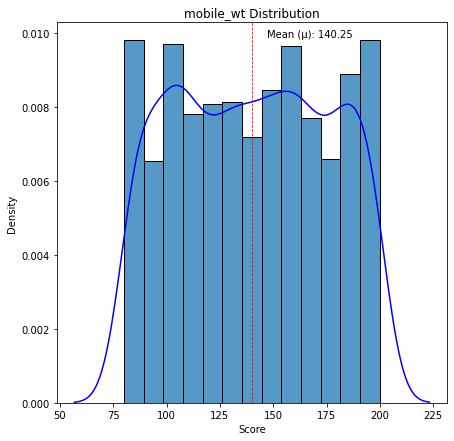

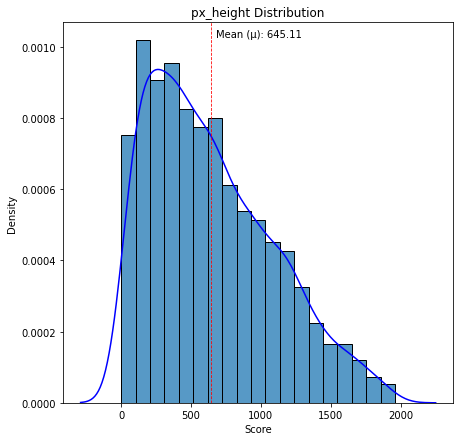

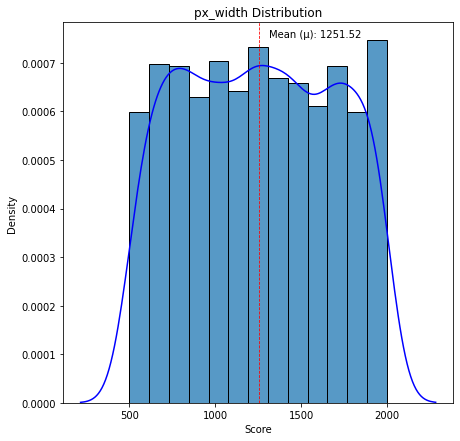

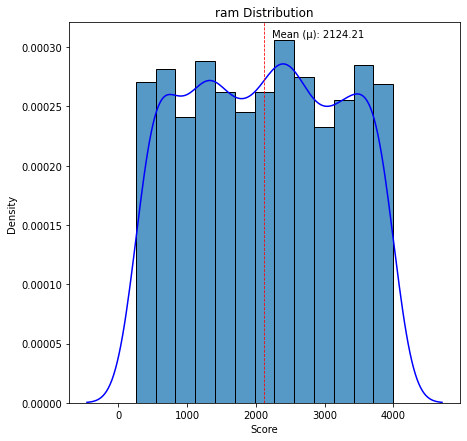

In [12]:
for column_name in num_features:
  plt.figure(figsize=(7, 7))
  plt.title("{column_name} Distribution".format(column_name = column_name))
  sns.histplot(df[column_name], stat='density')
  sns.kdeplot(df[column_name], color='blue')
  plt.axvline(df[column_name].mean(), color='red', linestyle='--', linewidth=0.8)
  min_ylim, max_ylim = plt.ylim()
  plt.text(df[column_name].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(df[column_name].mean()))
  plt.xlabel("Score")
  plt.ylabel("Density")
  plt.show()

Let's split data to test and training data

In [13]:
y = df['price_range']
X = df.drop('price_range', axis = 1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

# Logistic regression

In [15]:
lr = LogisticRegression(random_state = 42)

In [16]:
lr.fit(X_train, y_train)

LogisticRegression(random_state=42)

In [17]:
y_pred_lr = lr.predict(X_test)

In [18]:
accuracy = metrics.accuracy_score(y_test, y_pred_lr)

In [19]:
accuracy

0.64

In [20]:
len(df[df['price_range']==1])

500

In [21]:
len(df[df['price_range']==0])

500

In [22]:
len(df[df['price_range']==2])

500

In [23]:
len(df[df['price_range']==3])

500

# Confusion matrix

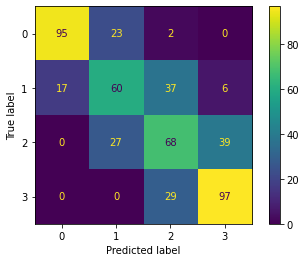

In [24]:
metrics.plot_confusion_matrix(lr,X_test, y_test)

In [25]:
91+65+62+85+30+1+27+31+11+1+29+40+27

500

# Random Forest

In [26]:
rc = RandomForestClassifier(random_state = 42)

In [27]:
rc.fit(X_train,y_train)

RandomForestClassifier(random_state=42)

In [28]:
y_pred_rc = rc.predict(X_test)

In [29]:
accuracy = metrics.accuracy_score(y_test, y_pred_rc)

In [30]:
accuracy

0.928

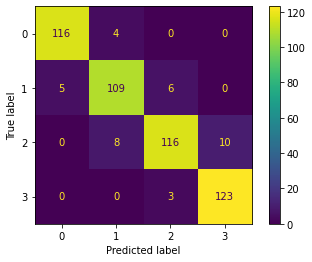

In [31]:
metrics.plot_confusion_matrix(rc,X_test, y_test)

# Support vector machines

In [32]:
from sklearn.svm import SVC

In [33]:
svc = SVC()

In [34]:
svc.fit(X_train, y_train)

SVC()

In [35]:
y_pred_svc = svc.predict(X_test)

In [36]:
accuracy_svc = metrics.accuracy_score(y_test, y_pred_svc)

In [37]:
accuracy_svc

0.96

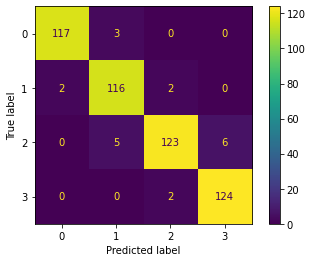

In [38]:
metrics.plot_confusion_matrix(svc,X_test, y_test)

writing functions for these three algorithms

In [39]:
def preprocess(name):
    df = pd.read_csv(name)
    y = df['price_range']
    X = df.drop('price_range', axis = 1)
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)
    return X_train, X_test, y_train, y_test

In [40]:
X_train, X_test, y_train, y_test = preprocess('/kaggle/input/mobile-price-classification/train.csv')

In [41]:
def modelling(x1, x2, y1, y2):
    
    
    lr = LogisticRegression(random_state = 42)
    rc =  RandomForestClassifier(random_state = 42)
    svc = SVC()
    
    lr.fit(X_train, y_train)
    rc.fit(X_train, y_train)
    svc.fit(X_train, y_train)
    
    y_pred_lr = lr.predict(X_test)
    y_pred_rc = rc.predict(X_test)
    y_pred_svc = svc.predict(X_test)
    
    accuracy_lr = metrics.accuracy_score(y_test, y_pred_lr)
    accuracy_rc = metrics.accuracy_score(y_test, y_pred_rc)
    accuracy_svc = metrics.accuracy_score(y_test, y_pred_svc)
    
    accuracy_list = [accuracy_lr, accuracy_rc, accuracy_svc]
    
    final = max(accuracy_list)
        
    return final

In [42]:
final = modelling(X_train, X_test, y_train, y_test)

In [43]:
final

0.95

creating class for our functions

In [44]:
class mine:
    
    def processs(name):
        df = pd.read_csv(name)
        y = df['price_range']
        X = df.drop('price_range', axis = 1)
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)
        return X_train, X_test, y_train, y_test
    
    def modeling(x1, x2, y1, y2):
    
    
        lr = LogisticRegression(random_state = 42)
        rc =  RandomForestClassifier(random_state = 42)
        svc = SVC()
    
        lr.fit(X_train, y_train)
        rc.fit(X_train, y_train)
        svc.fit(X_train, y_train)
    
        y_pred_lr = lr.predict(X_test)
        y_pred_rc = rc.predict(X_test)
        y_pred_svc = svc.predict(X_test)
    
        accuracy_lr = metrics.accuracy_score(y_test, y_pred_lr)
        accuracy_rc = metrics.accuracy_score(y_test, y_pred_rc)
        accuracy_svc = metrics.accuracy_score(y_test, y_pred_svc)
    
        accuracy_list = [accuracy_lr, accuracy_rc, accuracy_svc]
    
        final = max(accuracy_list)
        
        return final

In [45]:
X_train, X_test, y_train, y_test = mine.processs('/kaggle/input/mobile-price-classification/train.csv')

In [46]:
final = mine.modeling(X_train, X_test, y_train, y_test)

In [47]:
final

0.956

In [48]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


as we saw before,this data must be scaled

# Standard scaler

In [49]:
from sklearn.preprocessing import StandardScaler

# Normalize Training Data 
scaler = StandardScaler().fit(X_train)
X_train_std = scaler.transform(X_train)
X_test_std = scaler.transform(X_test)

#Converting numpy array to dataframe
X_train_std_df = pd.DataFrame(X_train_std, index=X_train.index, columns=X_train.columns)
X_test_std_df = pd.DataFrame(X_test_std, index=X_test.index, columns=X_test.columns) 

In [50]:
X_train_std_df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
911,0.125582,1.025663,1.561327,0.989390,-0.997548,-1.047808,-1.217038,1.388157,0.397492,-1.100320,0.682961,-1.090481,-1.695925,0.059355,0.891820,-0.866810,-0.362002,-1.786041,0.989390,0.980196
225,0.922942,1.025663,-0.152086,-1.010724,-0.764367,0.954373,-0.832490,-1.053734,1.660349,-1.100320,-0.794835,0.723222,0.986669,0.818813,-0.288669,0.066414,-0.914583,0.559897,0.989390,0.980196
523,0.419466,-0.974980,-1.253565,0.989390,0.168357,-1.047808,1.035312,-0.704893,-0.668922,0.216202,0.190362,-1.029573,-1.693614,1.139352,0.891820,-0.166892,-1.651357,-1.786041,-1.010724,-1.020204
522,1.182653,-0.974980,0.215074,0.989390,0.401537,0.954373,-0.997296,-0.007209,0.144920,-0.661479,-0.466436,0.486358,-0.036922,1.672065,0.891820,1.466251,-1.467164,0.559897,-1.010724,0.980196
103,1.617784,1.025663,1.561327,0.989390,-0.997548,0.954373,1.255053,0.341632,1.632286,-0.222639,0.026162,-0.729545,-1.686682,-0.987860,0.419624,0.999639,1.295741,0.559897,0.989390,-1.020204


# K-neighbors

In [51]:
from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()

model.fit(X_train,y_train)

predicted= model.predict(X_test)

In [52]:
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test,predicted)
accuracy

0.92

# Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier

In [54]:
first_tree = DecisionTreeClassifier()
first_tree.fit(X_train, y_train)
y_pred=first_tree.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
accuracy

0.85

In [55]:
class func:
    def process(data_name):
        df=pd.read_csv(data_name)
        y = df['price_range']
        X = df.drop('price_range', axis = 1)
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)
        return X_train, X_test, y_train, y_test

    def model(x1,x2,y1,y2):
        dt=DecisionTreeClassifier(random_state=42)
        knn=KNeighborsClassifier()
    
        dt.fit(X_train,y_train)
        knn.fit(X_train,y_train)
    
        y_pred_dt=dt.predict(X_test)
        y_pred_knn=knn.predict(X_test)
    
        accuracy_dt=metrics.accuracy_score(y_test,y_pred_dt)
        accuracy_knn=metrics.accuracy_score(y_test,y_pred_knn)
    
        accuracy_list=[accuracy_dt ,accuracy_knn]
        
        final = max(accuracy_list)
        
        return final

In [56]:
X_train, X_test, y_train, y_test = func.process('/kaggle/input/mobile-price-classification/train.csv')

In [57]:
final = func.model(X_train, X_test, y_train, y_test)

In [58]:
final

0.928